In [2]:
# Importing Dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [11]:
#import 2017 data

csvpath_2017 = os.path.join('Resources', '2017.csv')
csv_2017 = pd.read_csv(csvpath_2017)

#import happy_region df so we can merge and make region column

csvpath_region = os.path.join('happy_regions.csv')
csv_happy_regions = pd.read_csv(csvpath_region)

#lets take out just country and region columns
new_region_df = csv_happy_regions[["Country", "Region"]]

#rename column so it matches with the newly structured csv below
new_region_df = new_region_df.rename(columns={"Country": "Country or region"})

#check to see if it worked
#new_region_df

In [15]:
# Restructure / Rename
# datasets from 2015 - 2017.
#added region as as column************

# Convert / fix 2017 Data

csv_2017_restructured = csv_2017[["Happiness.Rank",
                                  "Country",
                                  "Happiness.Score",
                                  "Economy..GDP.per.Capita.",
                                  "Family",
                                  "Health..Life.Expectancy.",
                                  "Freedom",
                                  "Generosity",
                                  "Trust..Government.Corruption."]]

csv_2017_restructured = csv_2017_restructured.rename(columns={"Happiness.Rank": "Overall rank",
                                      "Country": "Country or region",
                                      "Happiness.Score": "Score",
                                      "Economy..GDP.per.Capita.": "GDP per capita",
                                      "Family": "Social support",
                                      "Health..Life.Expectancy.": "Healthy life expectancy",
                                      "Freedom": "Freedom to make life choices",
                                      "Generosity": "Generosity",
                                      "Trust..Government.Corruption.": "Perceptions of corruption"})
csv_2017_restructured.head()

#let's merge df with region category with csv 2017
merged_2017 = pd.merge(csv_2017_restructured, new_region_df, on="Country or region")
merged_2017

#write it as csv so we can look at it
#output file for data
output_file = os.path.join("2017_csv_regions.csv")
#open output file
with open(output_file, 'w') as datafile:
    merged_2017.to_csv(output_file)

merged_2017.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,Europe
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,Europe
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,Europe
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,Europe
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,Europe
5,6,Netherlands,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,Europe
6,7,Canada,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,North America
7,8,New Zealand,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,Australia and New Zealand
8,9,Sweden,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,Europe
9,10,Australia,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,Australia and New Zealand


slope:0.3
intercept:-0.63
R-squared: 0.6842
y=0.3x + -0.63


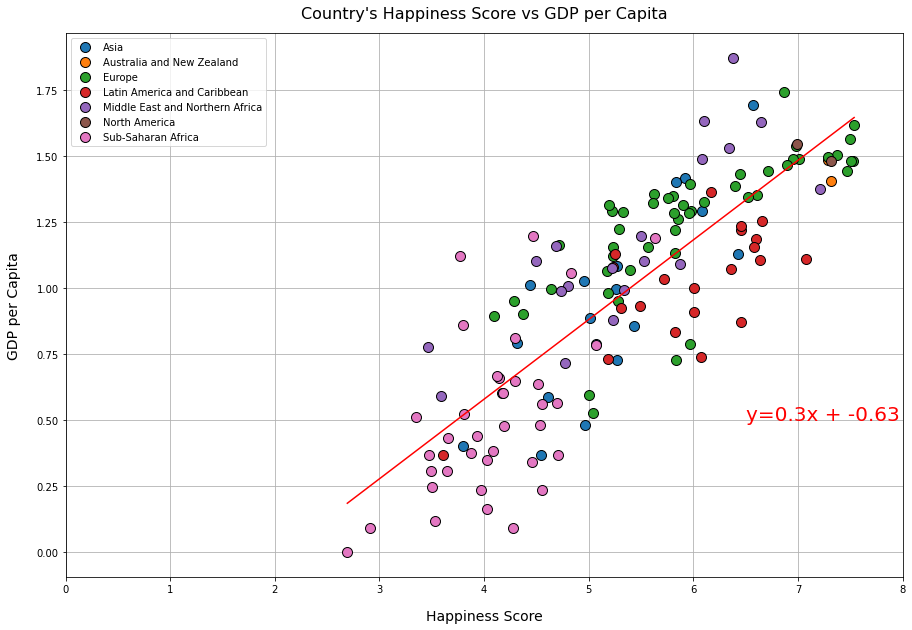

In [24]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = merged_2017["Score"]
y_values = merged_2017["GDP per capita"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2017["Country or region"]
region = merged_2017["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()

    
#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("GDP per Capita", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs GDP per Capita", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.show()

slope:0.19
intercept:0.18
R-squared: 0.5693
y=0.19x + 0.18


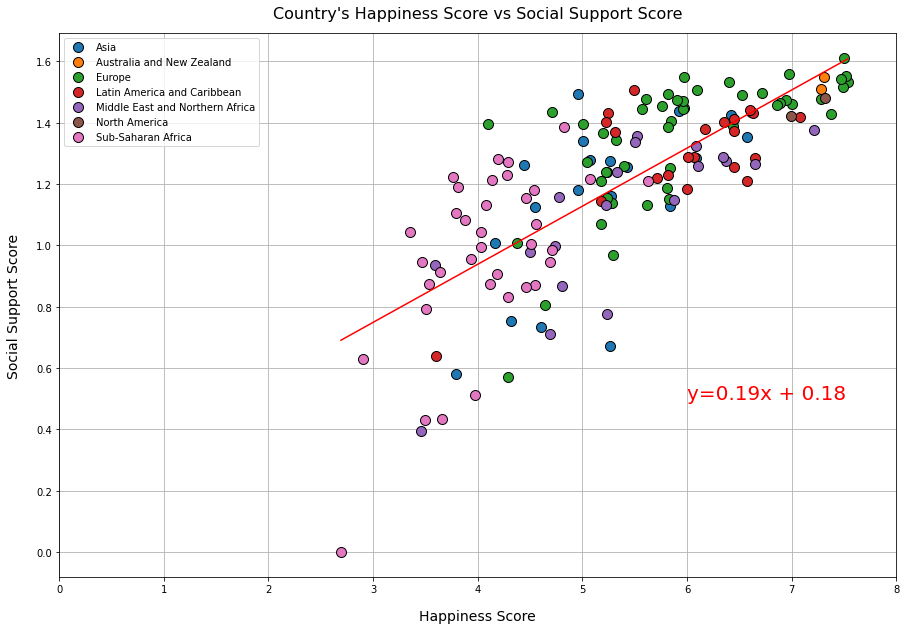

In [25]:
#scatter plot away!

#scatter plot: happiness score vs social support

#establish x and y values
x_values = merged_2017["Score"]
y_values = merged_2017["Social support"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2017["Country or region"]
region = merged_2017["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()

    
#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Social Support Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Social Support Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.5), fontsize =20, color = "red")
plt.show()

slope:0.16
intercept:-0.31
y=0.16x + -0.31


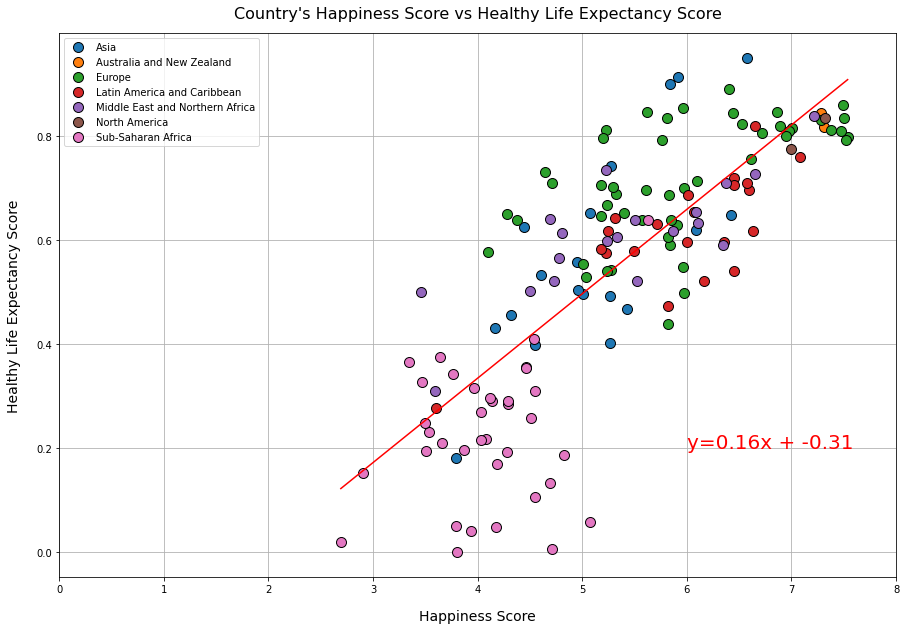

In [26]:
#scatter plot away!

#scatter plot: happiness score vs Healthy life expectancy

#establish x and y values
x_values = merged_2017["Score"]
y_values = merged_2017["Healthy life expectancy"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2017["Country or region"]
region = merged_2017["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()
    

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Healthy Life Expectancy Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Healthy Life Expectancy Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.2), fontsize =20, color = "red")
plt.show()

slope:0.08
intercept:0.0
R-squared: 0.3314
y=0.08x + 0.0


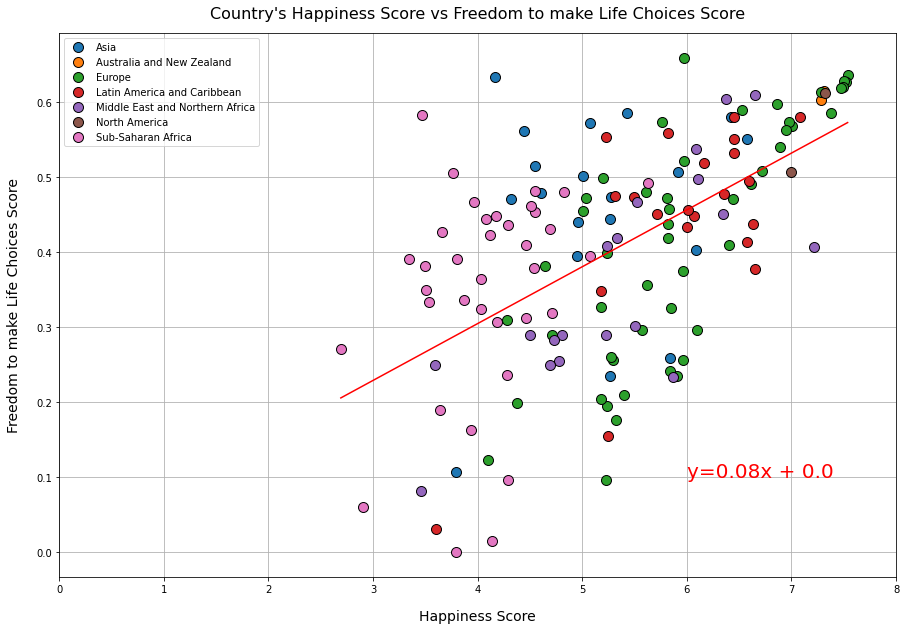

In [27]:
#scatter plot away!

#scatter plot: happiness score vs Freedom to make Life Choices

#establish x and y values
x_values = merged_2017["Score"]
y_values = merged_2017["Freedom to make life choices"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2017["Country or region"]
region = merged_2017["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()

    

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Freedom to make Life Choices Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Freedom to make Life Choices Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.1), fontsize =20, color = "red")
plt.show()

slope:0.02
intercept:0.15
R-squared: 0.0241
y=0.02x + 0.15


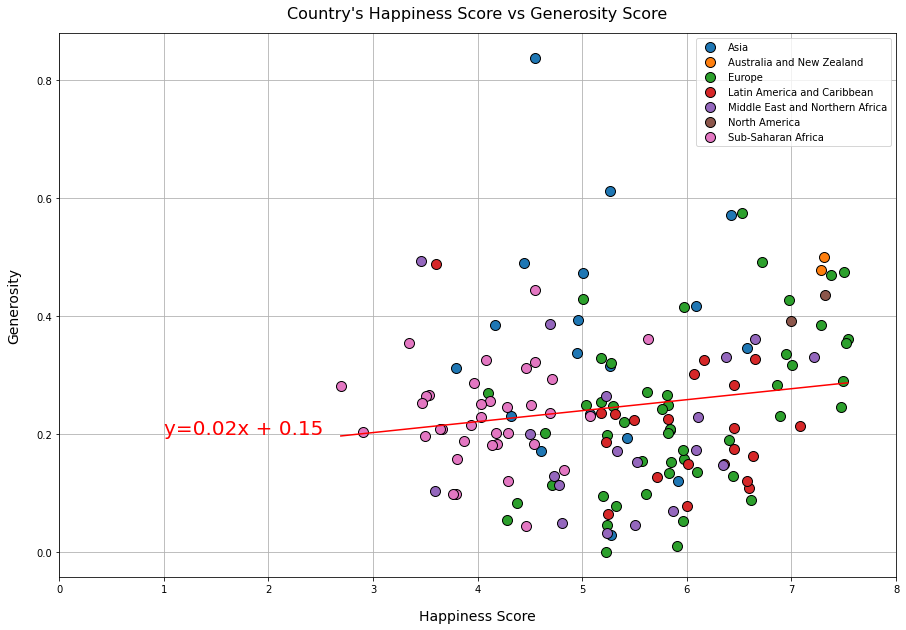

In [28]:
#scatter plot away!

#scatter plot: happiness score vs Generosity

#establish x and y values
x_values = merged_2017["Score"]
y_values = merged_2017["Generosity"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2017["Country or region"]
region = merged_2017["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()

    

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Generosity", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Generosity Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1, 0.2), fontsize =20, color = "red")
plt.show()

slope:0.04
intercept:-0.09
R-squared: 0.1996
y=0.04x + -0.09


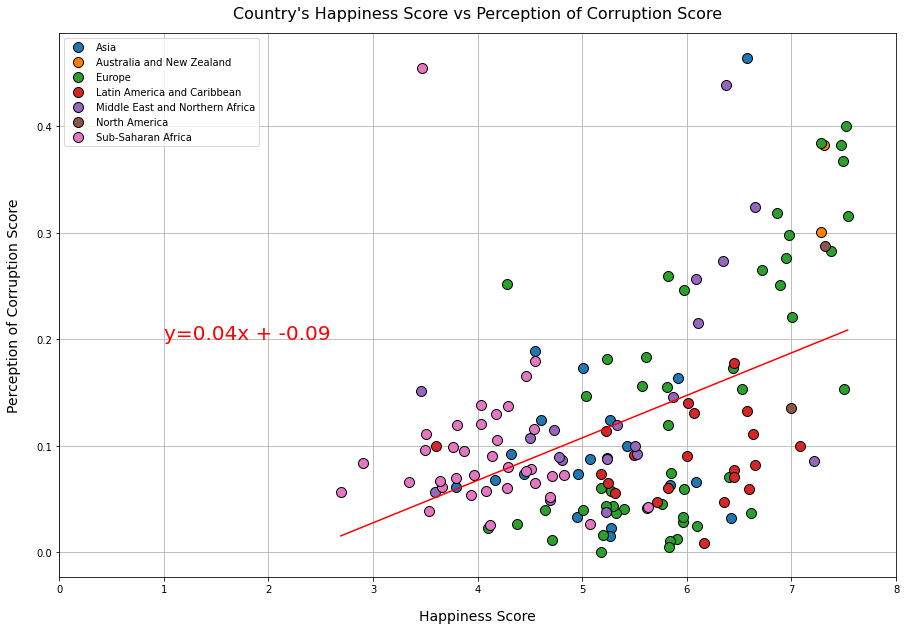

In [29]:
#scatter plot away!

#scatter plot: happiness score vs Perceptions of corruption

#establish x and y values
x_values = merged_2017["Score"]
y_values = merged_2017["Perceptions of corruption"]

#create scatter plot
#make df with all the vlaues I want to incorporate
country = merged_2017["Country or region"]
region = merged_2017["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)
    
#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

plt.figure(figsize=(15,10))


#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 

    ax = plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", 
             label=index, markersize=10, markeredgecolor="black")
   
    #create legend and add grid
    plt.legend()

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Perception of Corruption Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Perception of Corruption Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1,0.2), fontsize =20, color = "red")
plt.show()